# Problem Statement

## About Company :
Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban and rural areas. The customer first applies for a home loan after that company validates the customer's eligibility for a loan.

Problem :
The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out the online application form.

These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others.

To automate this process, they have given a problem identifying the customer segments eligible for loan amounts to target these customers specifically.

## Hypothesis Geenration

## This is a very important stage in any data analytics / data science / machine learning pipeline. It involves understanding the problem in detail by brainstorming as many factors as possible which can impact the outcome. It is done by understanding the problem statement thoroughly and before looking at the data.

Below are some of the factors which we think can affect the Loan Approval (dependent variable for this loan prediction problem):

Salary: Applicants with high income should have more chances of loan approval.
Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval.
Loan amount: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
Loan term: Loan for less time period and less amount should have higher chances of approval.
EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.


These are some of the factors which we think can affect the target variable, you can come up with many more factors.

In [1]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


## importing the dependencies or library

In [2]:
#Import the Dependencies
from sklearn.pipeline import Pipeline
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import norm
import statistics
import pandas_profiling
import pandas_profiling as pf
from pandas_profiling import ProfileReport

/var/folders/by/ymb55j1n39nd_1l6_11kg8j80000gn/T/ipykernel_3741/1946508069.py:19: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [3]:
kk=pd.read_csv("loan_sanction_train.csv")

In [4]:
#pandas_profiling.ProfileReport(kk)

In [5]:
#profile = pandas_profiling.ProfileReport(kk)
#profile.to_file(outputfile="./report.html")

In [6]:
kk.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [7]:
kk.tail()

Loan_ID  Gender Married Dependents Education Self_Employed  \
609  LP002978  Female      No          0  Graduate            No   
610  LP002979    Male     Yes         3+  Graduate            No   
611  LP002983    Male     Yes          1  Graduate            No   
612  LP002984    Male     Yes          2  Graduate            No   
613  LP002990  Female      No          0  Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N

In [8]:
kk.shape

(614, 13)

In [9]:
kk.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [10]:
kk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
kk.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
kk.groupby('Loan_Status').sum()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_Status                                                                     
N                    1045647      360539.000000     27371.0           63996.0   
Y                    2272077      634905.919989     59305.0          141204.0   

             Credit_History  
Loan_Status                  
N                      97.0  
Y                     378.0

In [13]:
kk.groupby('Loan_Status').mean()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_Status                                                                     
N                5446.078125        1877.807292  151.220994        344.064516   
Y                5384.068720        1504.516398  144.294404        341.072464   

             Credit_History  
Loan_Status                  
N                  0.541899  
Y                  0.981818

In [14]:
kk['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [15]:
kk.groupby('Loan_Status').value_counts()

Loan_Status  Loan_ID   Gender  Married  Dependents  Education     Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area
N            LP001003  Male    Yes      1           Graduate      No             4583             1508.0             128.0       360.0             1.0             Rural            1
             LP001014  Male    Yes      3+          Graduate      No             3036             2504.0             158.0       360.0             0.0             Semiurban        1
             LP001964  Male    Yes      0           Not Graduate  No             1800             2934.0             93.0        360.0             0.0             Urban            1
             LP002161  Female  No       1           Graduate      No             4723             0.0                81.0        360.0             1.0             Semiurban        1
             LP002158  Male    Yes      0           Not Graduate  No             3000          

In [16]:
kk.groupby('Loan_Status',sort=True).count()

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
Loan_Status                                                                   
N                192     187      192         186        192            183   
Y                422     414      419         413        422            399   

             ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_Status                                                                     
N                        192                192         181               186   
Y                        422                422         411               414   

             Credit_History  Property_Area  
Loan_Status                                 
N                       179            192  
Y                       385            422

In [17]:
kk.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
kk.dropna(inplace=True)

In [19]:
kk.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
kk.duplicated().sum()

0

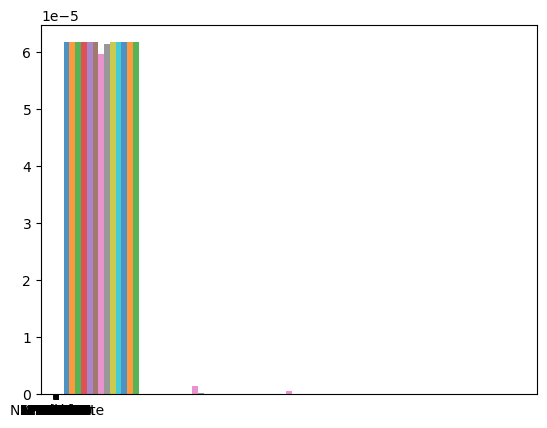

In [21]:
# Plotting the histogram.
plt.hist(kk, bins=5, density=True, alpha=0.8)
  
plt.show()

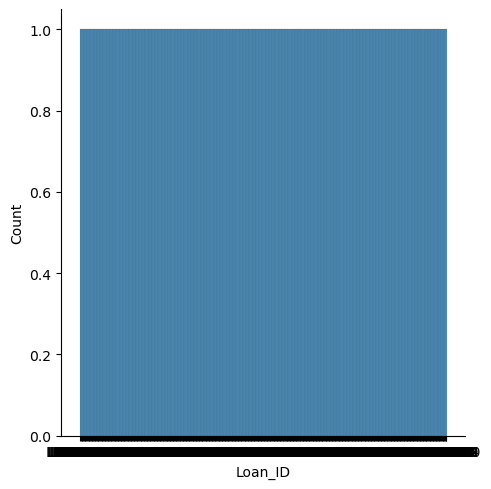

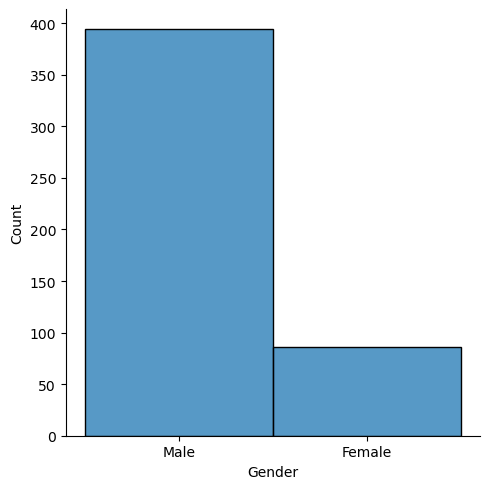

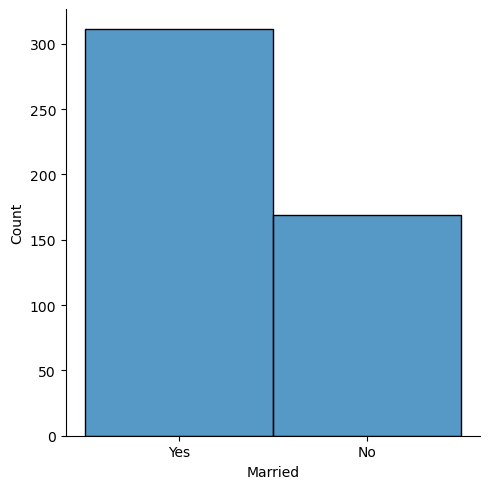

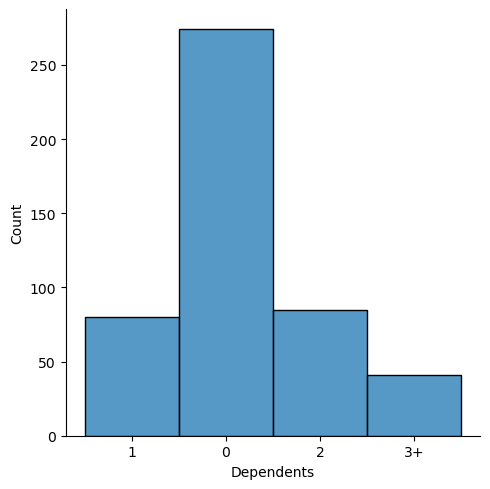

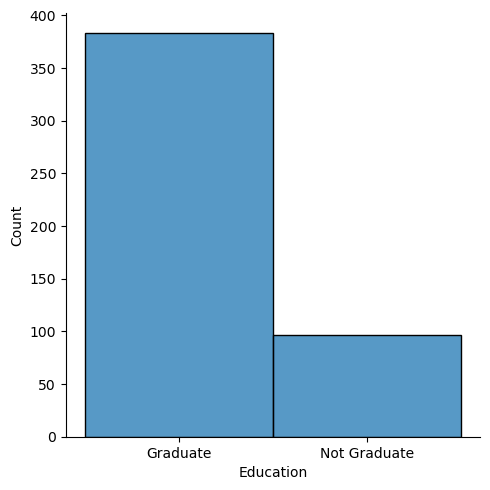

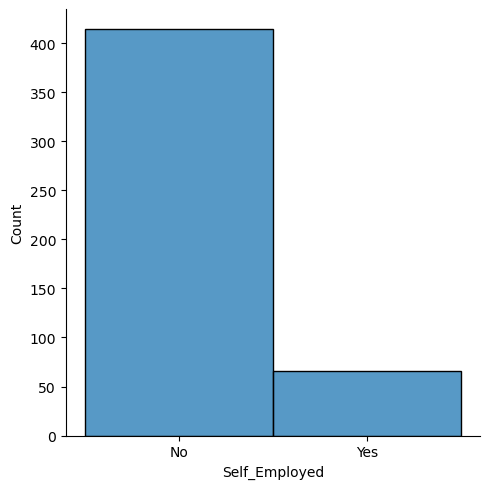

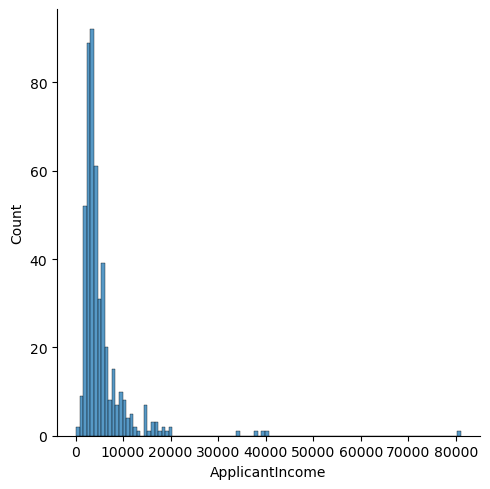

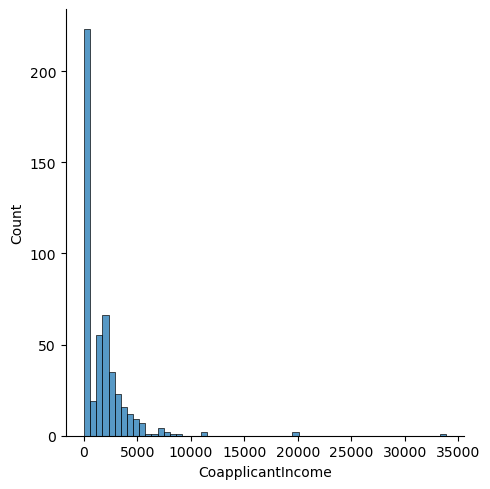

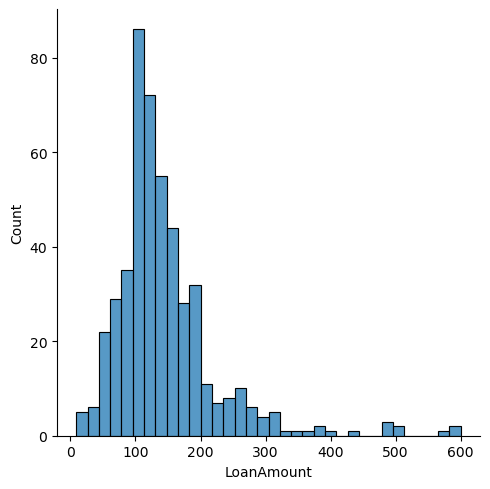

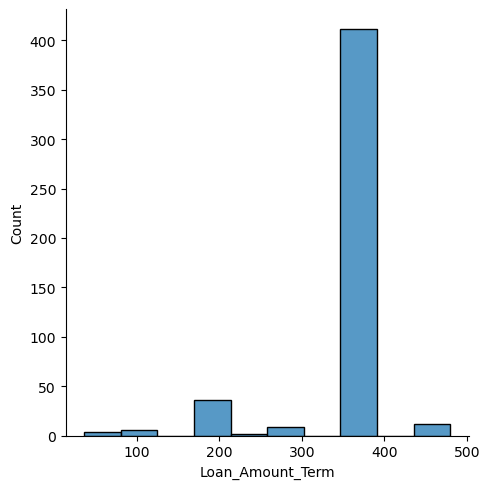

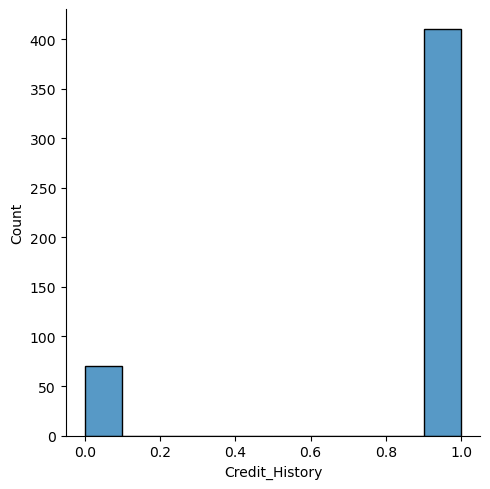

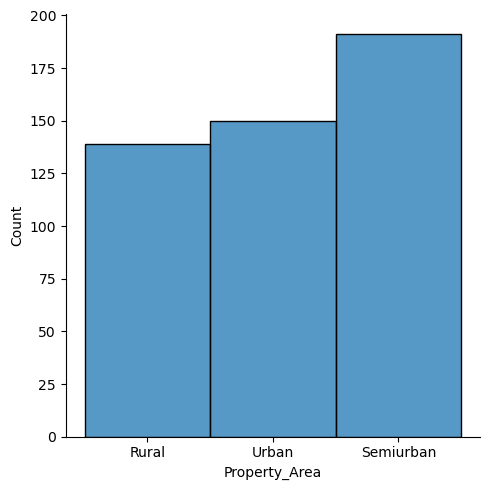

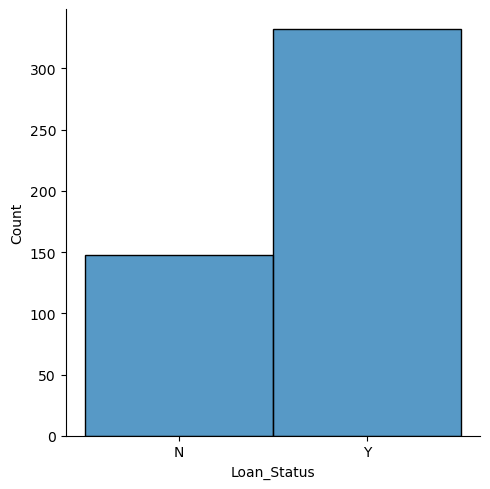

In [22]:
#creating for loop to get the distributon plot for all columns
for columns in kk:
    sns.displot(x=columns,data=kk)

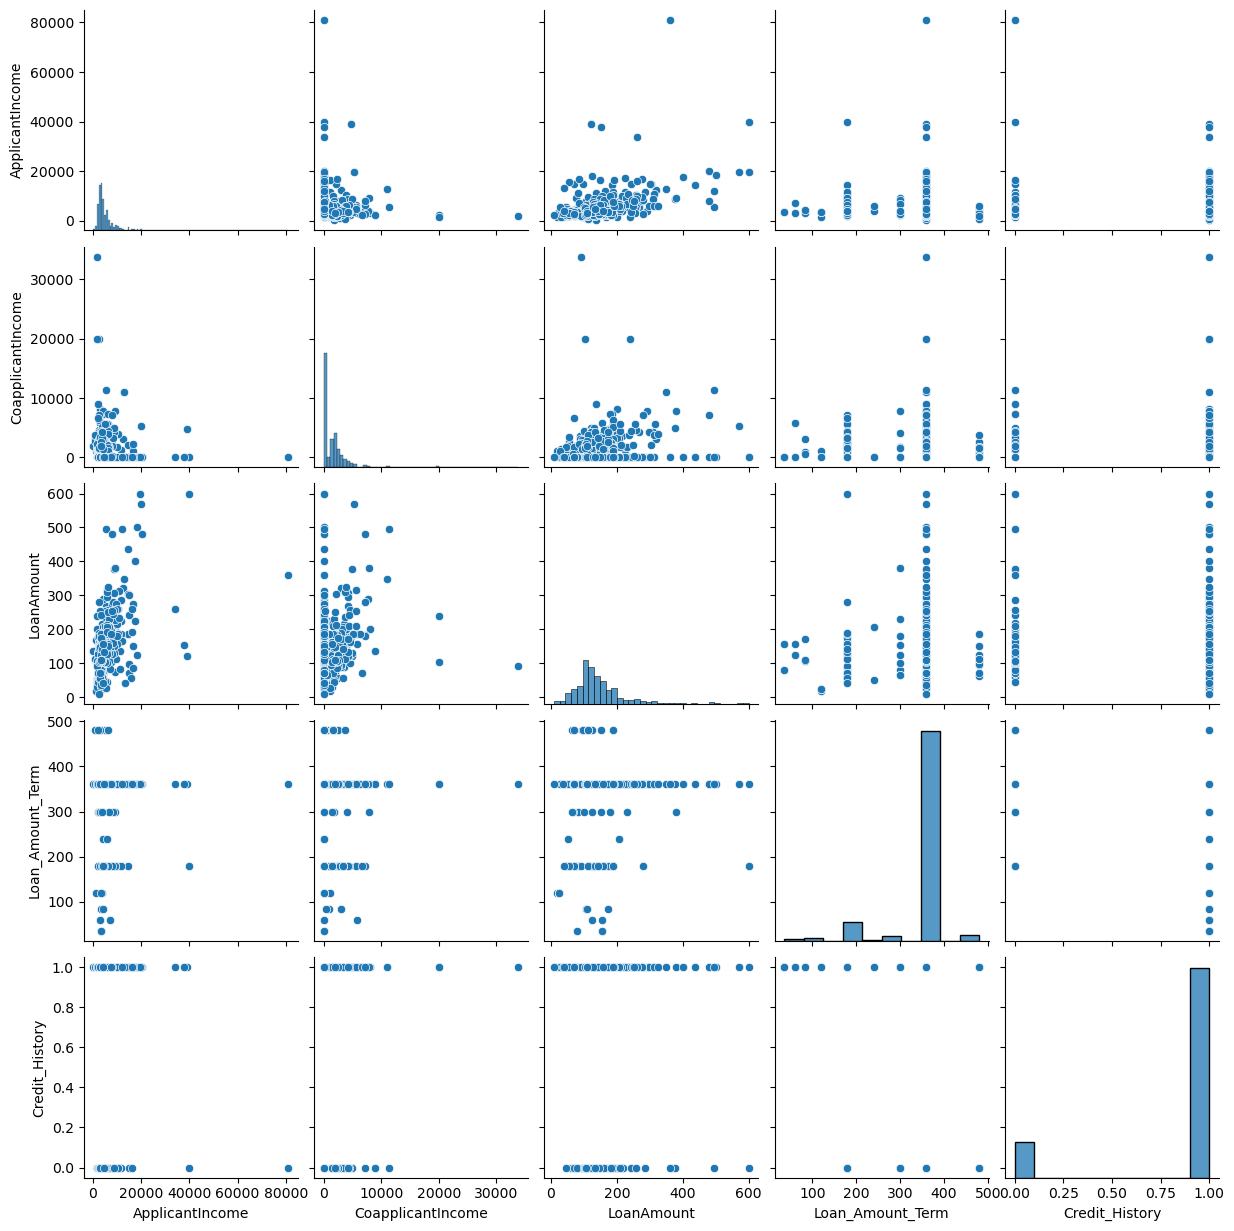

In [23]:
sns.pairplot(kk)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

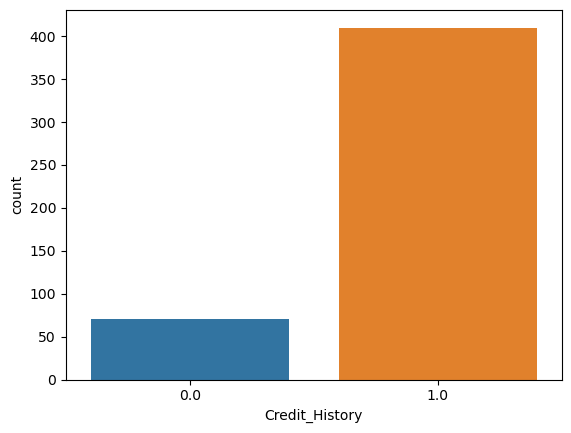

In [24]:
sns.countplot(x="Credit_History",data=kk)

In [25]:
correlation=kk.corr()

<AxesSubplot:>

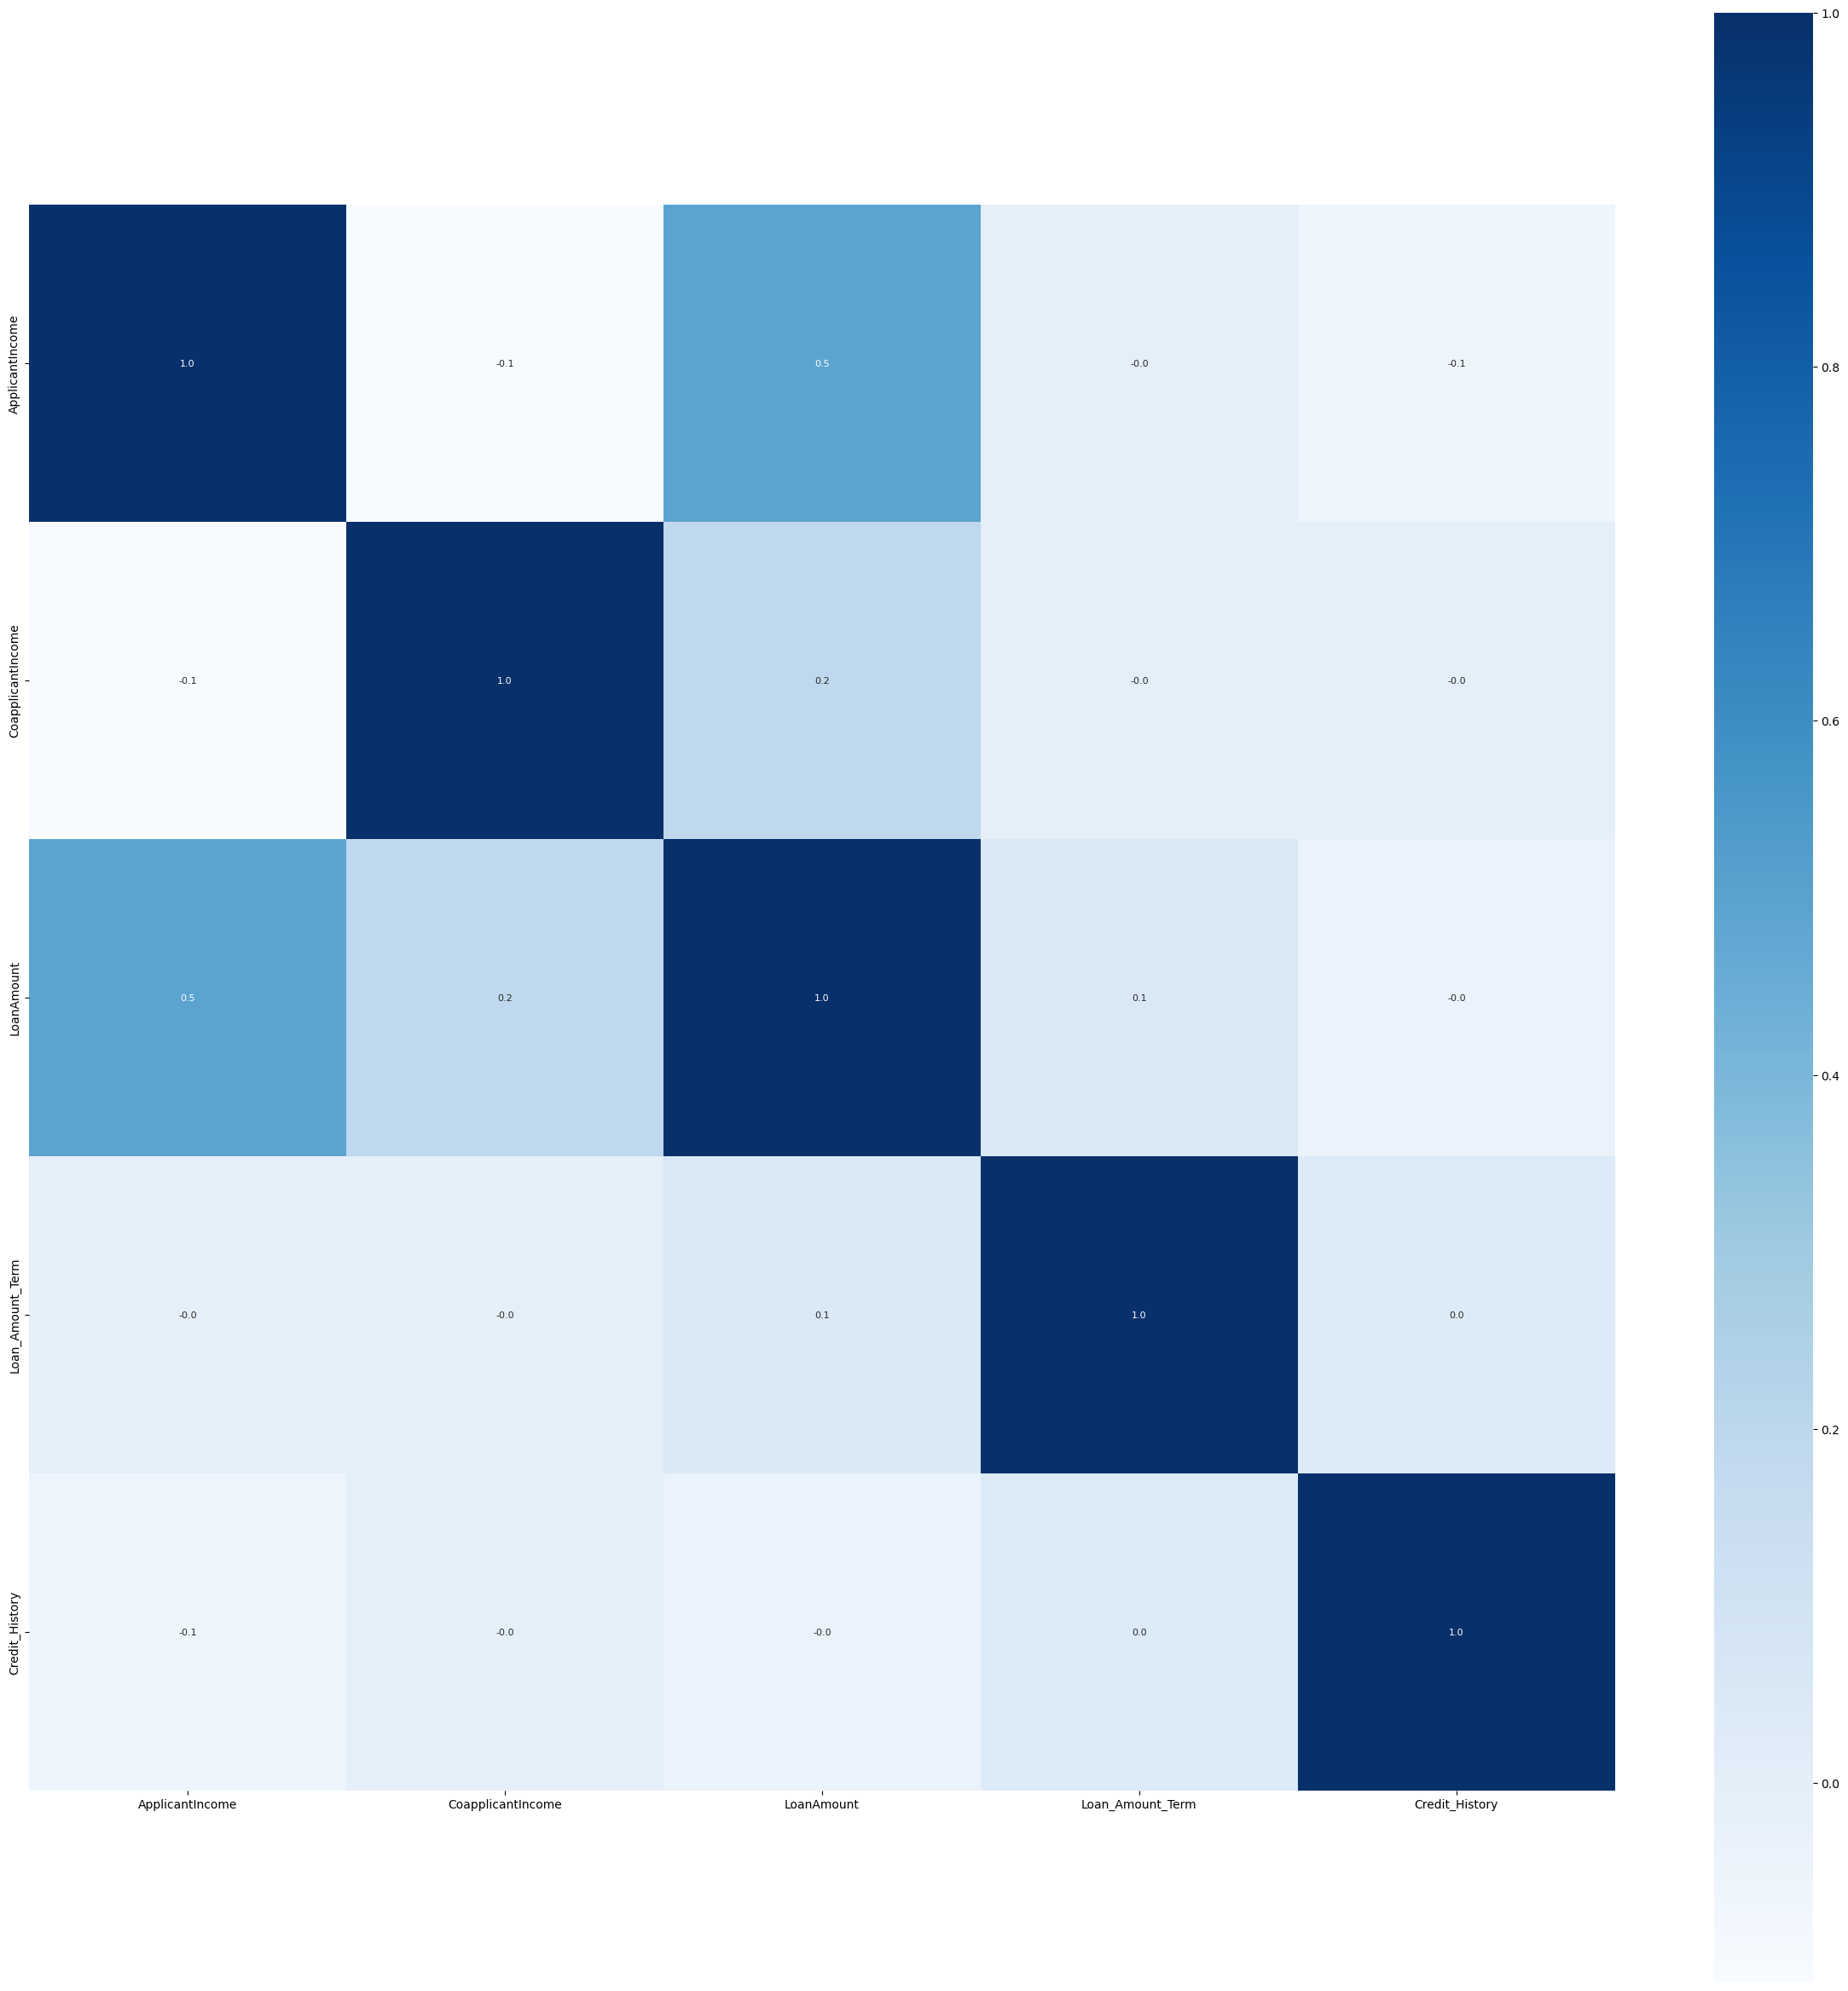

In [26]:
plt.figure(figsize=(30,30))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f', annot=True,annot_kws={'size':8},cmap='Blues')

## now i will try to visualize all these things using matlib library

# Univaraite Analysis

## Target Variable
As its categorical variable let us look at its frequency table, percentage distribution and bar plot.

In [27]:
kk['Loan_Status'].value_counts(normalize='True')

Y    0.691667
N    0.308333
Name: Loan_Status, dtype: float64

<AxesSubplot:>

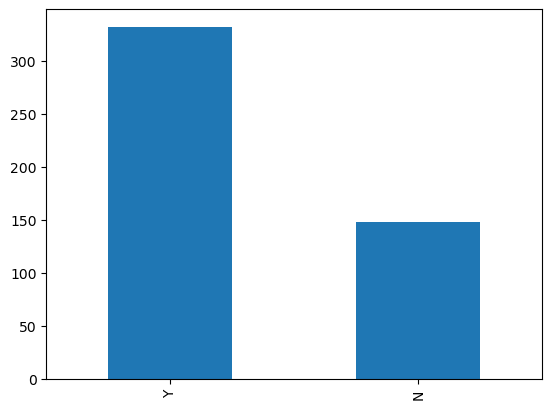

In [28]:
kk['Loan_Status'].value_counts().plot.bar()

<AxesSubplot:>

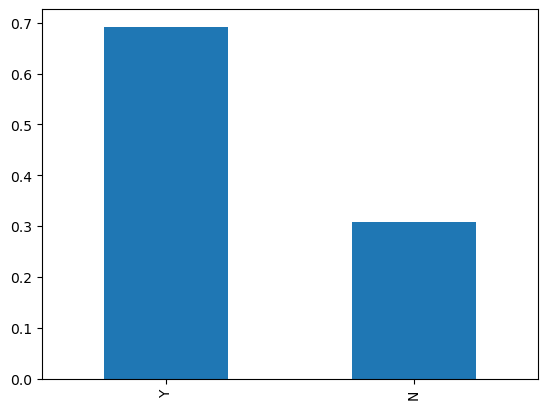

In [29]:
kk['Loan_Status'].value_counts(normalize='True').plot.bar()

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

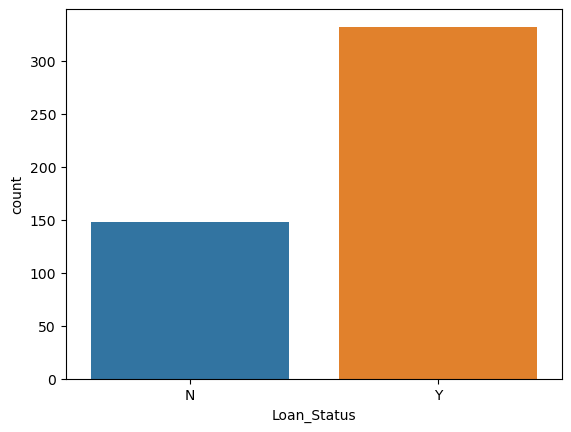

In [30]:
#using seaborn
#or we can use seaborn for see easily visualization
sns.countplot(x='Loan_Status',data=kk)

### Now lets visualize each variable separately.

Categorical features

These features have categories (Gender, Married, Self_Employed, Credit_History,Loan_Status)
Ordinal features:

Variables in categorical features having some order involved (Dependents, Education, Property_Area)
Numerical features

These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

### Independent Variable (Categorical)

<AxesSubplot:title={'center':'Credit_History'}>

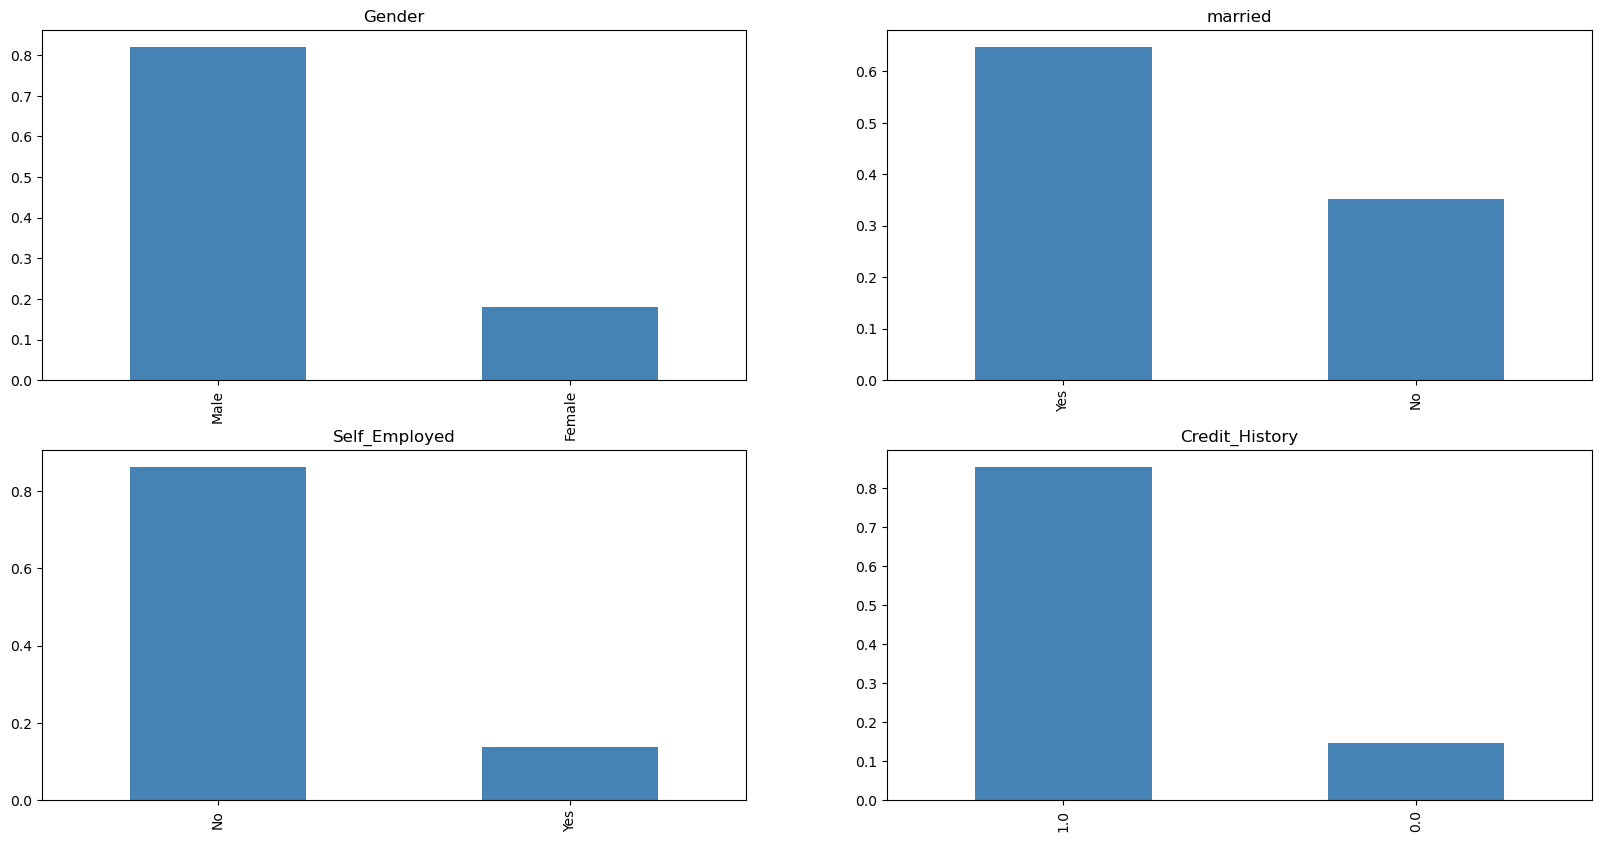

In [31]:
#using matplotlib
plt.figure(1)
plt.subplot(221)
kk['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender',color='steelblue')
plt.subplot(222)
kk['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='married',color='steelblue')
plt.subplot(223)
kk['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Self_Employed',color='steelblue')
plt.subplot(224)
kk['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Credit_History',color='steelblue')

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

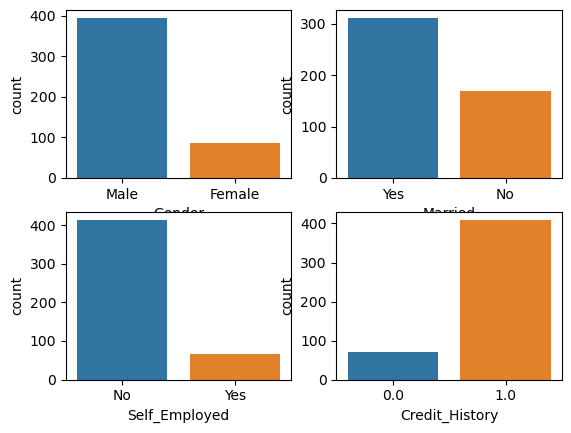

In [32]:
#using seaborn in easy way
plt.figure(2)
plt.subplot(221)
sns.countplot(x='Gender',data=kk)
plt.subplot(222)
sns.countplot(x='Married',data=kk)
plt.subplot(223)
sns.countplot(x='Self_Employed',data=kk)
plt.subplot(224)
sns.countplot(x='Credit_History',data=kk)

### It can be inferred from the above bar plots that:

80% applicants in the dataset are male.

Around 65% of the applicants in the dataset are married.

Around 15% applicants in the dataset are self employed.

Around 85% applicants have repaid their debts.

### Independent variable (Ordinal)

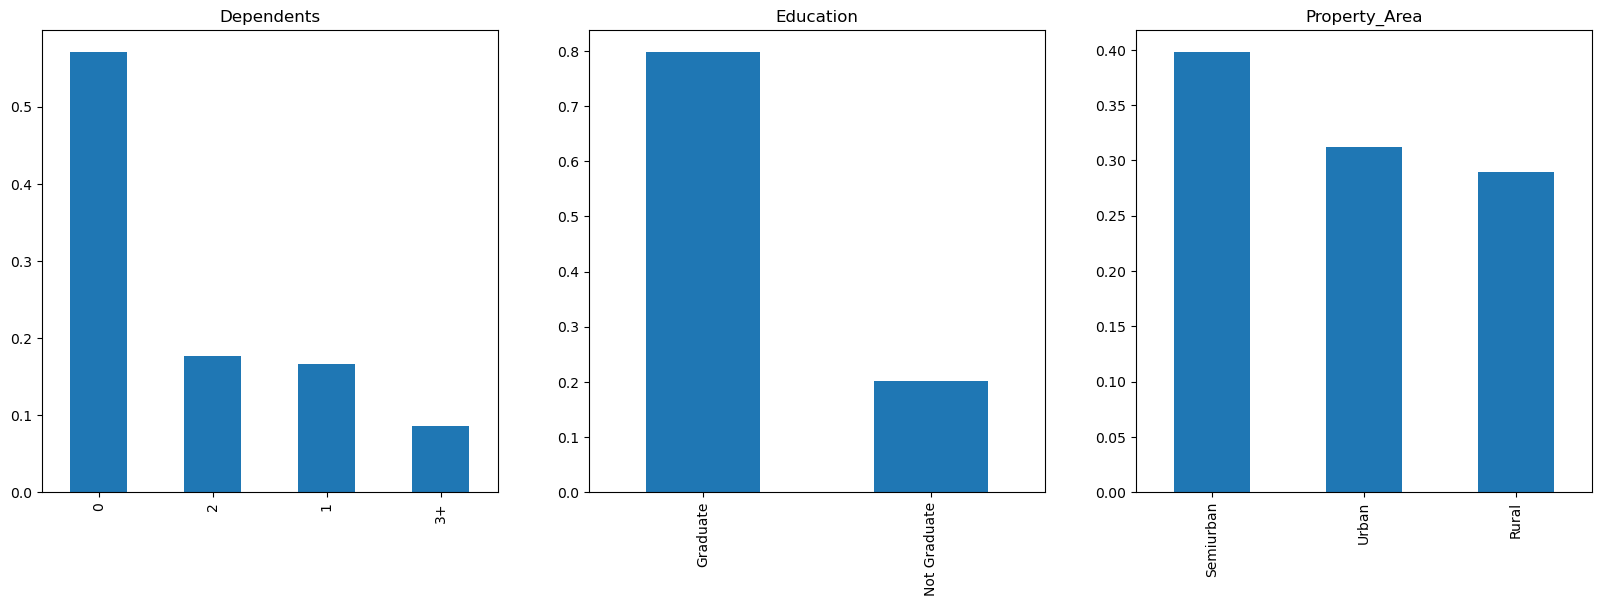

In [33]:
plt.figure(1)
plt.subplot(131)
kk['Dependents'].value_counts(normalize=True).plot.bar(figsize = (20,6), title='Dependents')

plt.subplot(132)
kk['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(133)
kk['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

## Independent Variable

/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


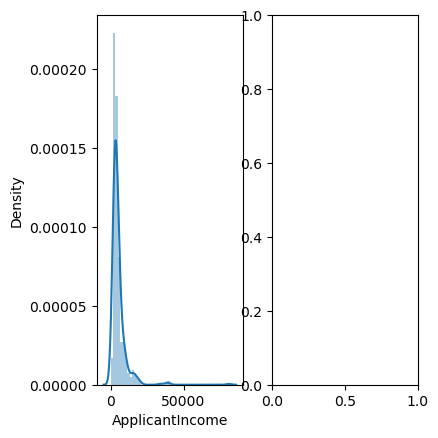

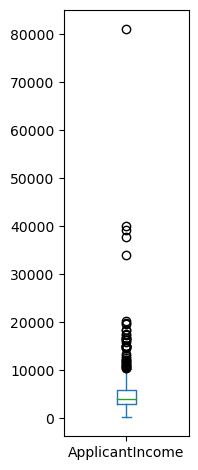

In [34]:
#Disribution Of application income
plt.figure(1)
plt.subplot(131)
sns.distplot(kk['ApplicantIncome'])
plt.subplot(132)
sns.displot(data=kk['ApplicantIncome'])
plt.subplot(133)
kk['ApplicantIncome'].plot.box()
plt.show()

Text(0.5, 1.0, '')

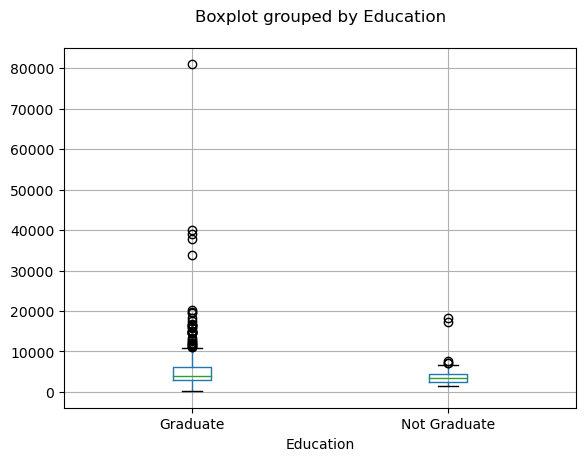

In [35]:
#applicant income by education
kk.boxplot(column='ApplicantIncome',by="Education")
plt.title("")

### There are higher number of graduates with very high incomes, which are appearing to be the outliers

/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


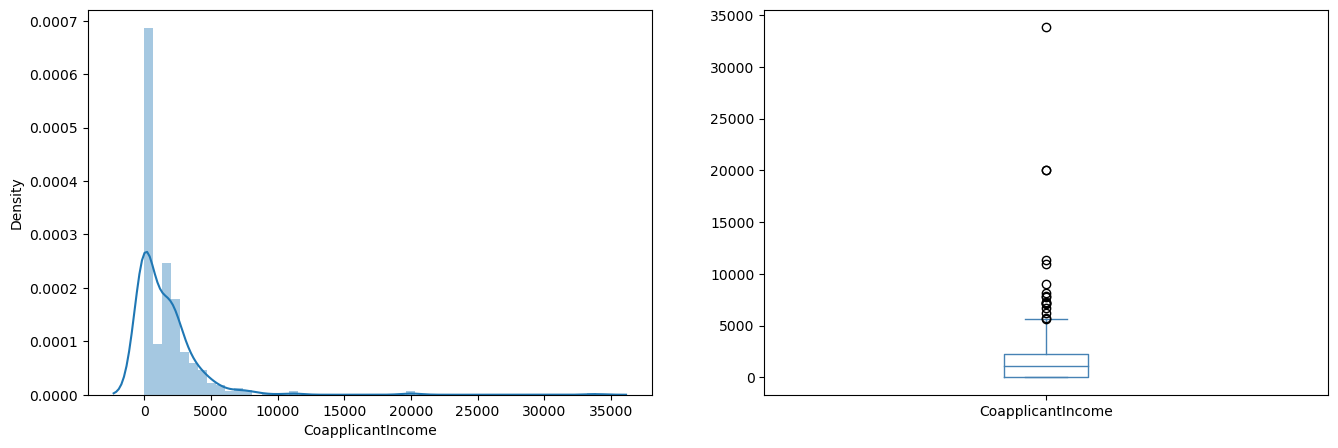

In [36]:
# Distribution of co-applicant income

plt.figure(1)
plt.subplot(121)
sns.distplot(kk['CoapplicantIncome'])
plt.subplot(122)
kk['CoapplicantIncome'].plot.box(figsize=(16,5),color='steelblue')
plt.show()

/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


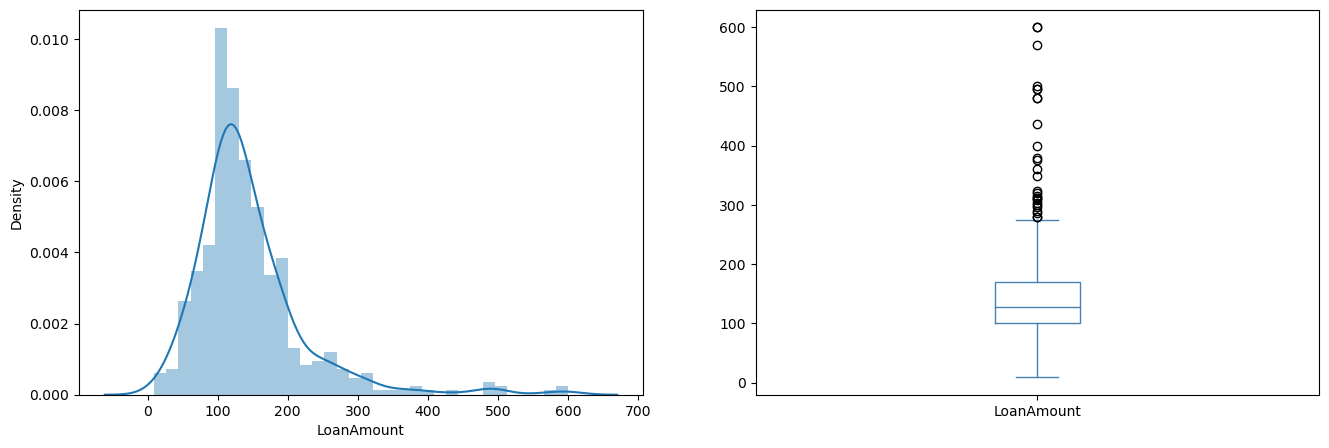

In [37]:
# Distributon of Loan Amount

plt.figure(1)
plt.subplot(121)

sns.distplot(kk['LoanAmount'])

plt.subplot(122)
kk['LoanAmount'].plot.box(figsize=(16,5),color='steelblue')

plt.show()

<AxesSubplot:ylabel='LoanAmount'>

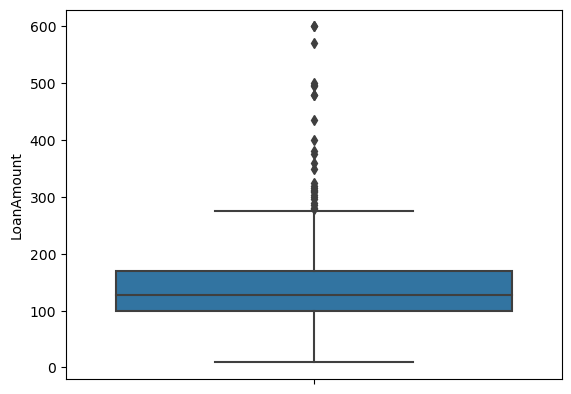

In [38]:
#or uuse sns for barplot
sns.boxplot(y="LoanAmount",data=kk)

In [39]:
pandas_profiling.ProfileReport(kk)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='Loan_Status', ylabel='Count'>

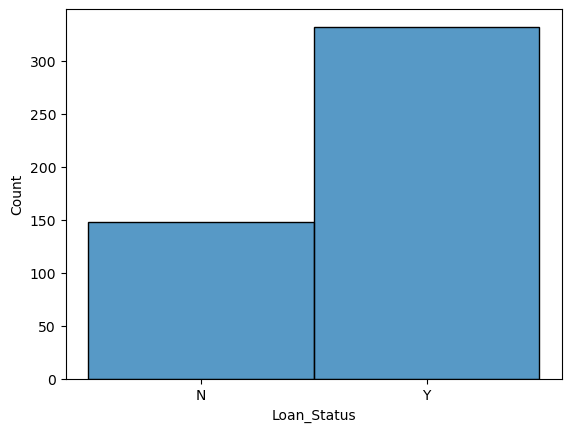

In [40]:
sns.histplot(x='Loan_Status',data=kk)

<AxesSubplot:xlabel='Loan_Status', ylabel='Count'>

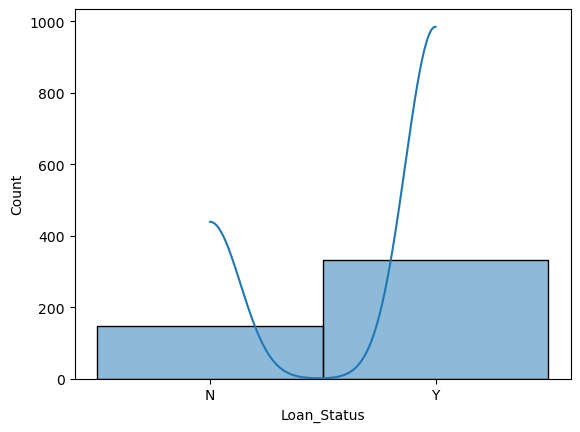

In [41]:
sns.histplot(kk.Loan_Status,kde=True)

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

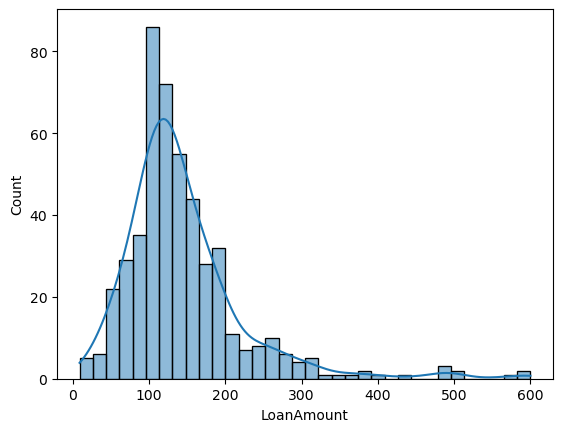

In [42]:
sns.histplot(kk.LoanAmount,kde=True)

# Bivariate Analysis

## (i) continuous vs categorical data

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

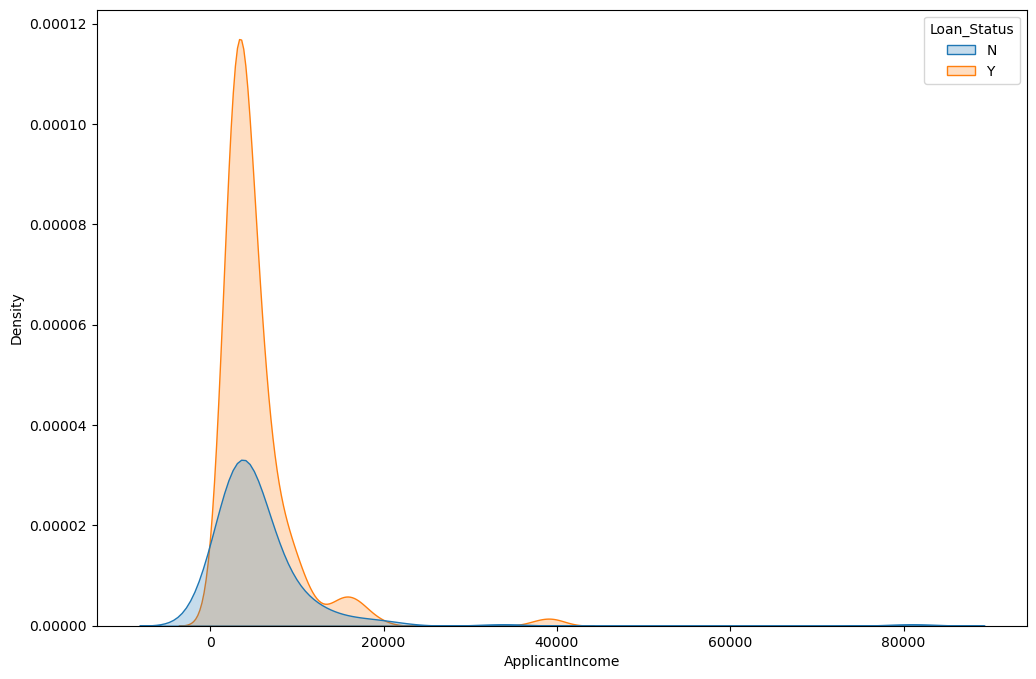

In [43]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=kk,x='ApplicantIncome',hue='Loan_Status',fill=True)

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

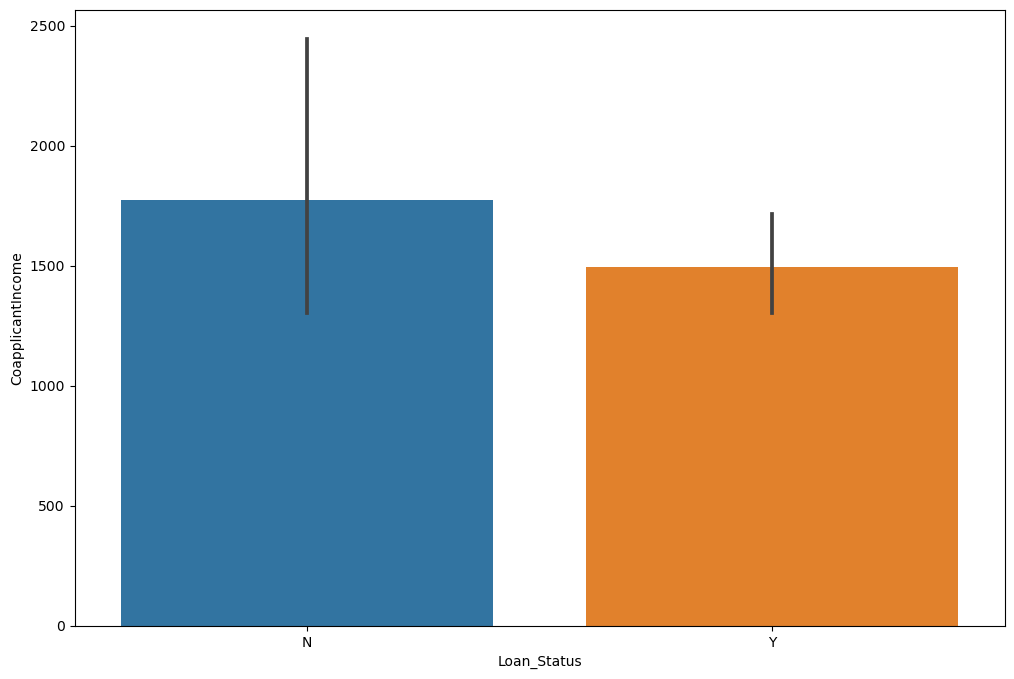

In [44]:
plt.figure(figsize=(12,8))
sns.barplot(data=kk,y='CoapplicantIncome',x='Loan_Status')

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

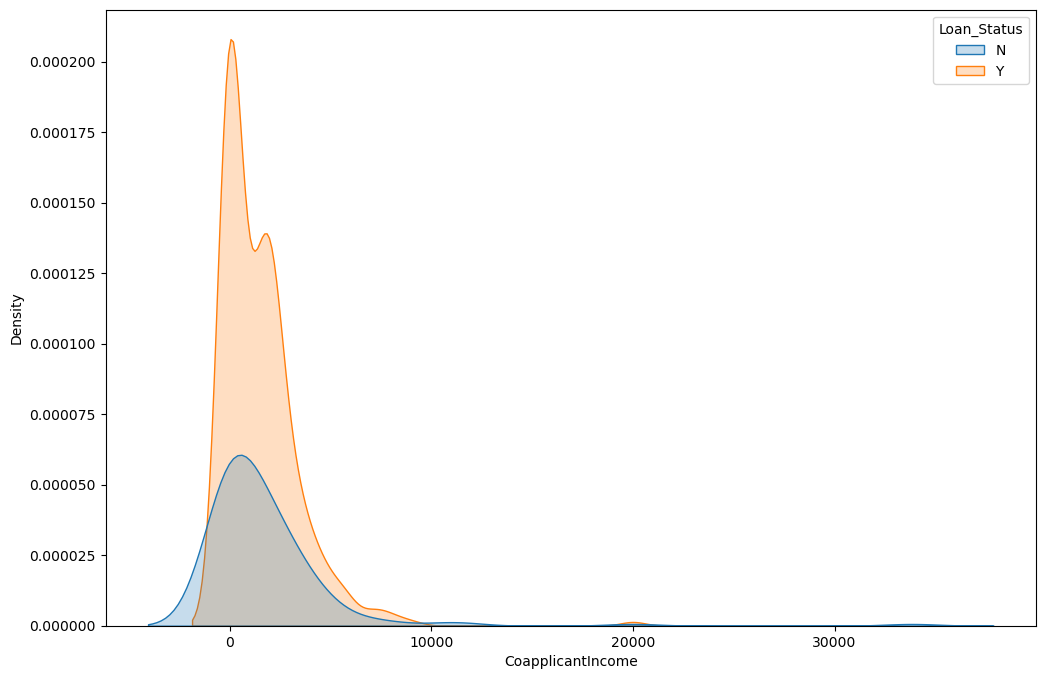

In [45]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=kk,x='CoapplicantIncome',hue='Loan_Status',fill=True)
#This is used in categorical vs continuous.
#this is in Density.
#for see this in percentage use crosstab

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

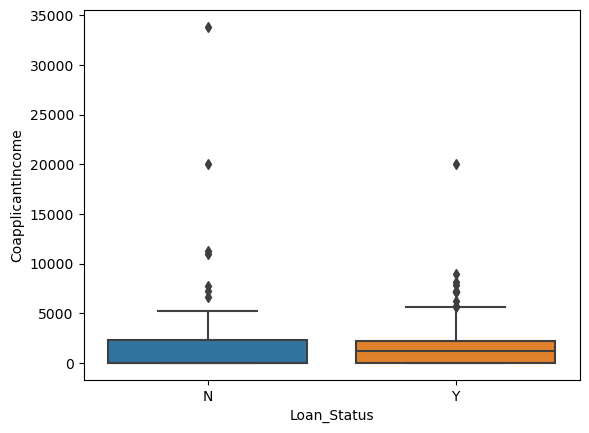

In [46]:
sns.boxplot(data=kk,y='CoapplicantIncome',x='Loan_Status')

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

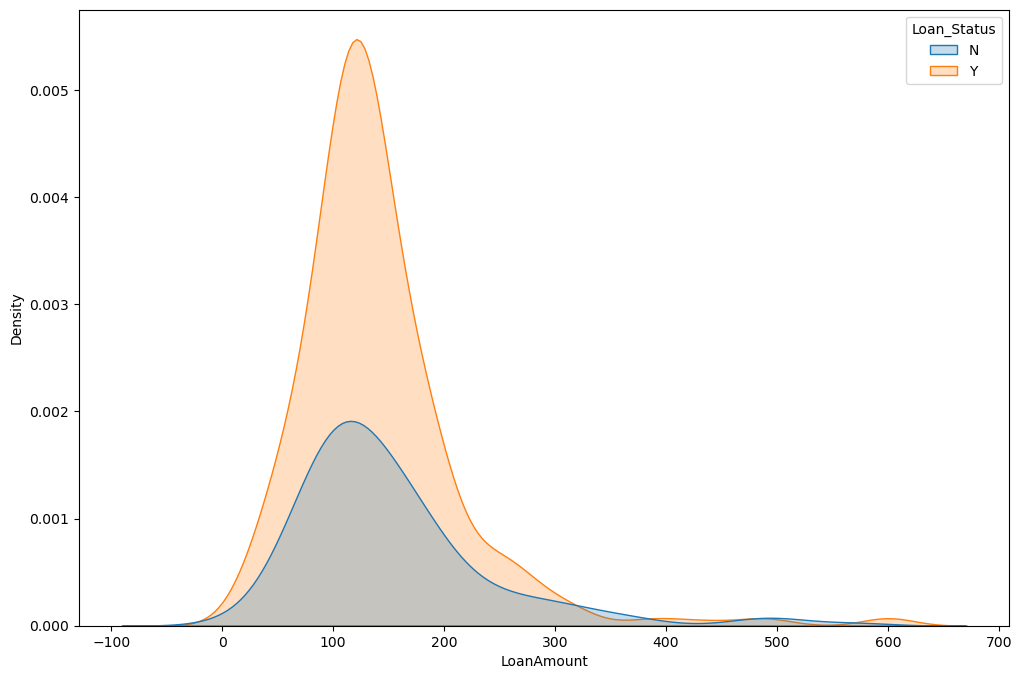

In [47]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=kk,x='LoanAmount',hue='Loan_Status',fill=True)
#This is used in categorical vs continuous.
#this is in Density.
#for see this in percentage use crosstab

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

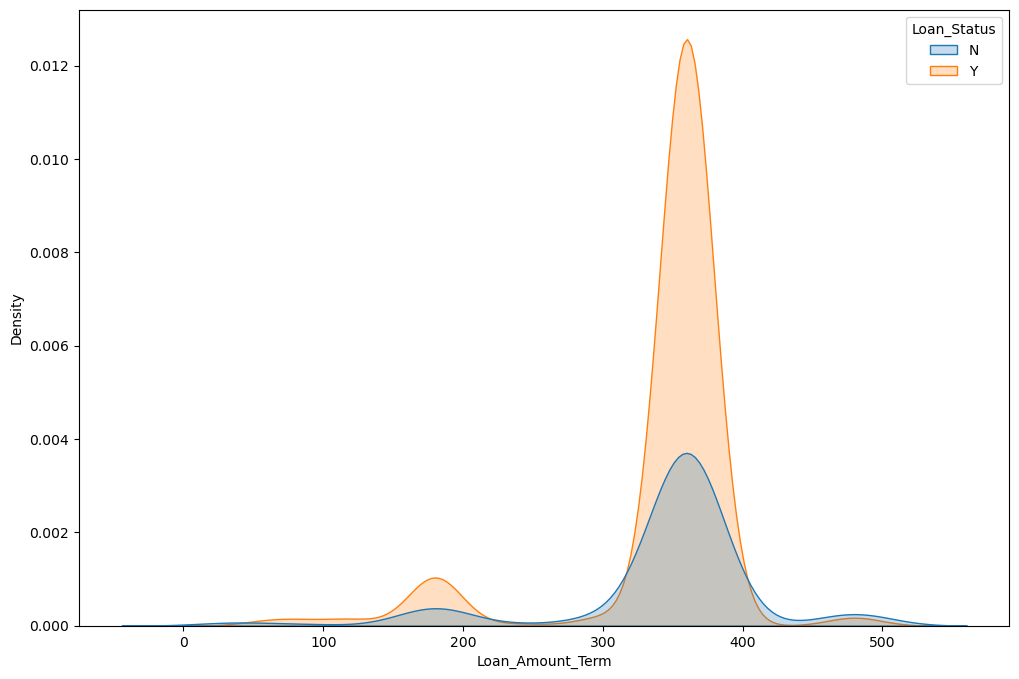

In [48]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=kk,x='Loan_Amount_Term',hue='Loan_Status',fill=True)
#This is used in categorical vs continuous.
#this is in Density.
#for see this in percentage use crosstab

## categorical vs categorical

<AxesSubplot:xlabel='Gender', ylabel='count'>

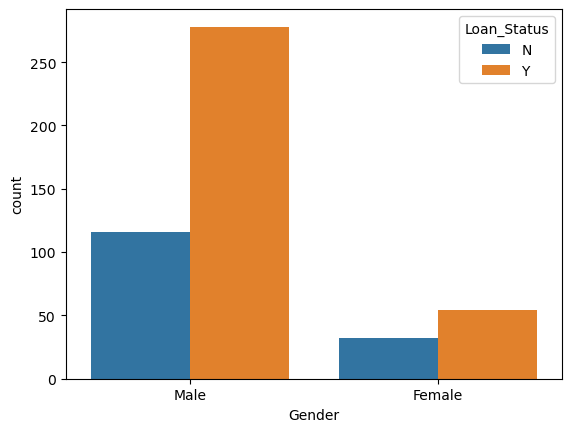

In [49]:
sns.countplot(data=kk,x='Gender',hue='Loan_Status')
#if we want to stack this then we have to use crosstab and heatmap

### for getting a loan for male and female applicant is more or less same for both approved and unapproved

<AxesSubplot:xlabel='Married', ylabel='count'>

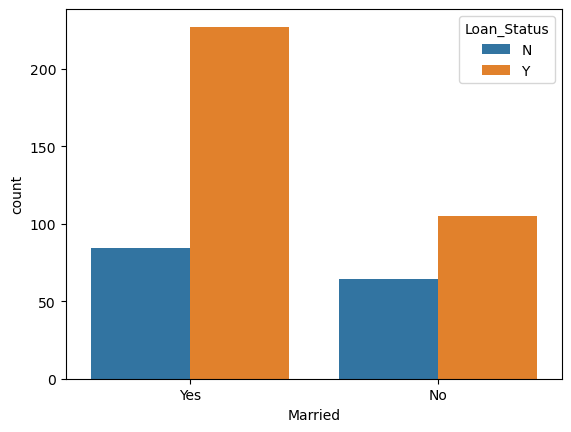

In [50]:
sns.countplot(data=kk,x='Married',hue='Loan_Status')

### Those who are married have more chance to get loan

<AxesSubplot:xlabel='Dependents', ylabel='count'>

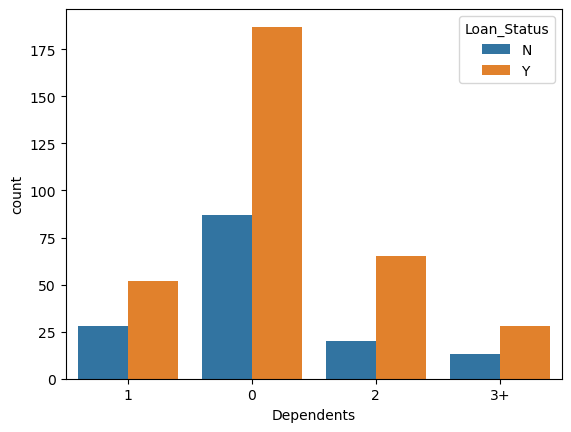

In [51]:
sns.countplot(data=kk,x='Dependents',hue='Loan_Status')

## The chance of getting a loan is inversely proportional  to no. of dependent people o.here it also that the people who take care of 2 people have more chance of getting a loan

<AxesSubplot:xlabel='Education', ylabel='count'>

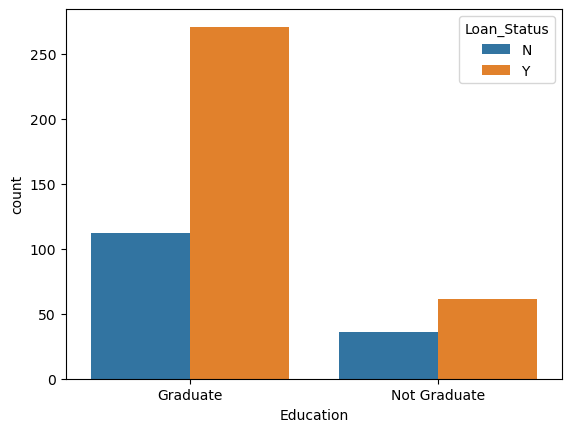

In [52]:
sns.countplot(data=kk,x='Education',hue='Loan_Status')

#### The chance of getting a loan is more for the person who have done graduate

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

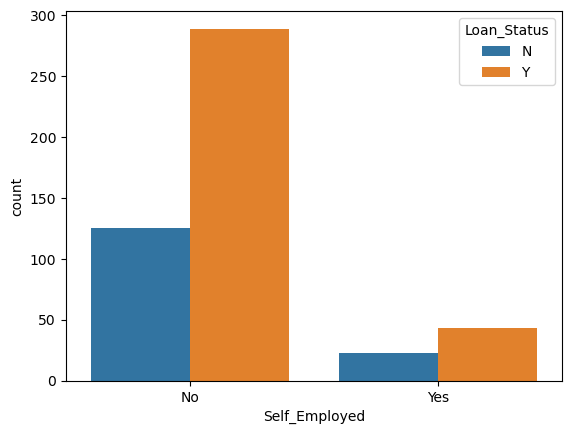

In [53]:
sns.countplot(data=kk,x='Self_Employed',hue='Loan_Status')

### both have chance to get loan.no conlusion

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

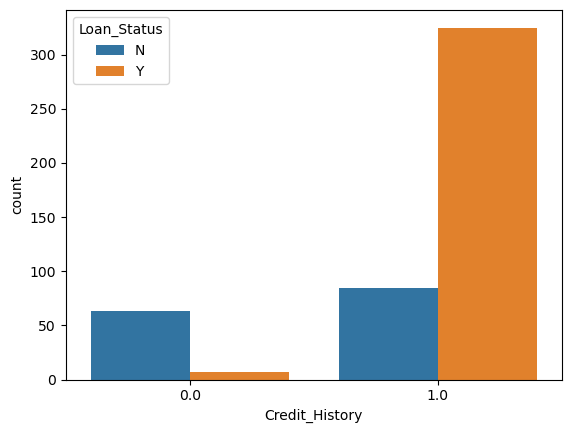

In [54]:
sns.countplot(data=kk,x='Credit_History',hue='Loan_Status')

### Those who have good credit history have more chance to get a loan

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

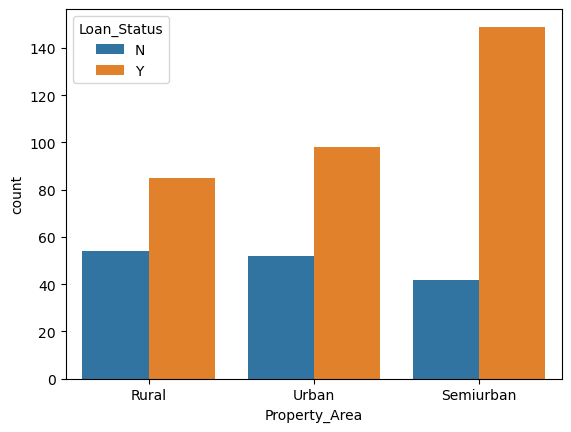

In [55]:
sns.countplot(data=kk,x="Property_Area",hue='Loan_Status')

### the people belongs from rural area have less chance to get a loan
#The people belong from urban Area have like more or less equal chance of both
#The people belong from SemiUrban Have more chance to getting a loan

## Bivariate Analysis.here i used crosstab,groupby,stack

## The analysis using two variables is referred to as Bivariate Analysis 

Categorical Independent Variable v/s Target Variable

<AxesSubplot:xlabel='Gender'>

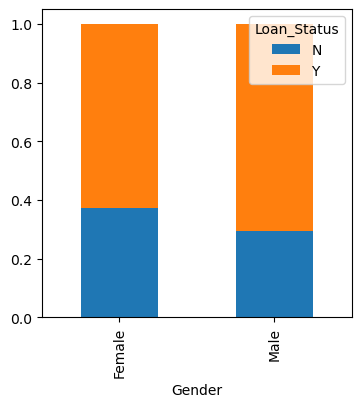

In [56]:
Gender=pd.crosstab(kk['Gender'],kk['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

## Proportion of female and male applicants is more or less same for both approved and unapproved loans.

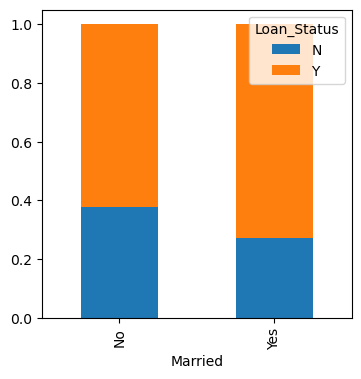

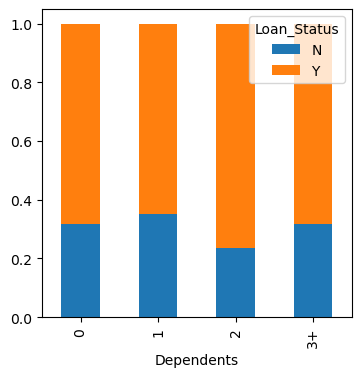

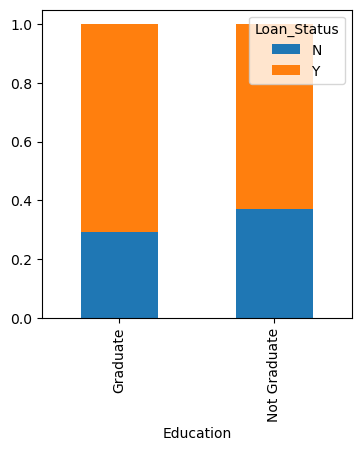

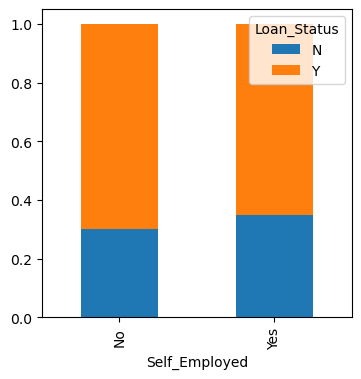

In [57]:
Married = pd.crosstab(kk['Married'],kk['Loan_Status'])
Dependents = pd.crosstab(kk['Dependents'],kk['Loan_Status'])
Education = pd.crosstab(kk['Education'],kk['Loan_Status'])
Self_Employed = pd.crosstab(kk['Self_Employed'],kk['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

### proportion of marrid applicant is higher for the approved loans.
distribution of applicant with 1 or 3+ dependets is similar accross both the categories of Loan_Status
There is nothing significant we can infer from Self_Employed vs Loan_Status plot

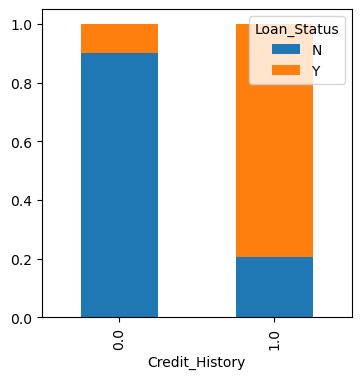

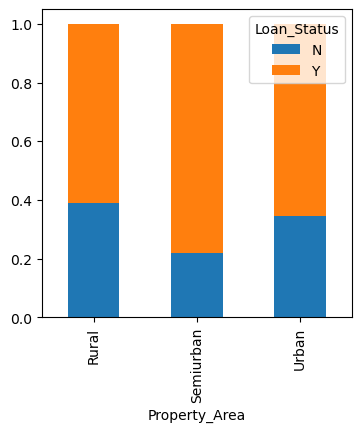

In [58]:
ch=pd.crosstab(kk['Credit_History'],kk['Loan_Status'])
Pa=pd.crosstab(kk['Property_Area'],kk['Loan_Status'])
ch.div(ch.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Pa.div(Pa.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

### Numerical Independent Variable vs Target

# We will try to find the mean income of people for which the loan has approved vs mean income of people for which the has not approved.

In [59]:
kk.groupby('Loan_Status')['ApplicantIncome'].mean()

Loan_Status
N    5730.189189
Y    5201.093373
Name: ApplicantIncome, dtype: float64

<AxesSubplot:xlabel='Loan_Status'>

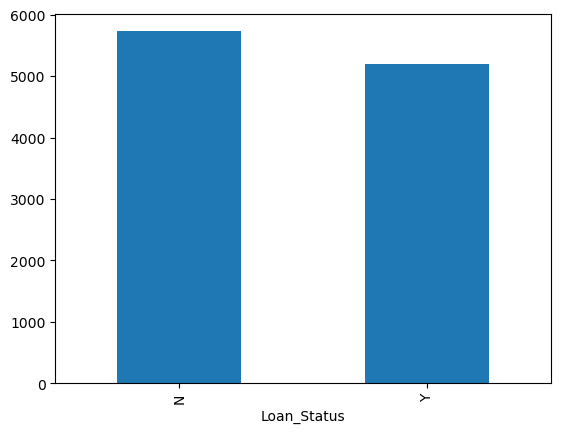

In [60]:
kk.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

# those who have good income is least interested in loan

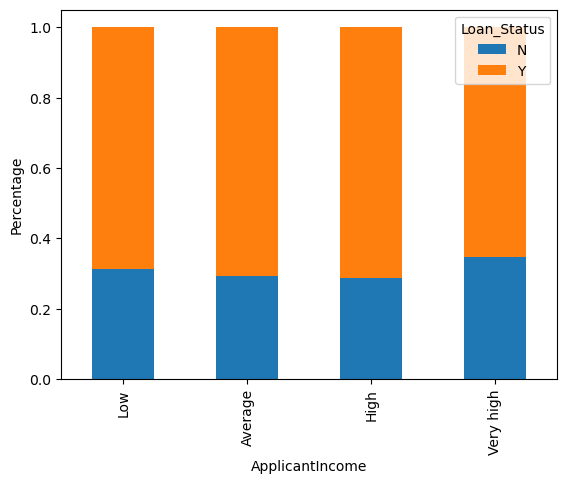

In [61]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
kk['Income_bin']=pd.cut(kk['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(kk['Income_bin'],kk['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

#### analyze the coapplicant income and loan amount variable

In [62]:
bins = [0,1000,3000,42000]
group = ['Low', 'Average', 'High']
kk['Coapplicant_Income_bin'] = pd.cut(kk['CoapplicantIncome'],bins,labels=group)

In [63]:
kk

Loan_ID  Gender Married Dependents     Education Self_Employed  \
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
5               5417             4196.0       267.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status Income_bin  \
1               1.0         Rural           N       High   
2               1.0         Urban           Y    Average   
3               1.0         Urban           Y    Average   
4               1.0         Urban           Y       High   
5               1.0         Urban           Y       High   
..              ...           ...         ...        ...   
609             1.0         Rural           Y    Average   
610             1.0         Rural           Y       High   
611             1.0         Urban           Y  Very high   
612             1.0         Urban           Y  Very high   
613             0.0     Semiurban           N       High   

    Coapplicant_Income_bin  
1                  Average  
2                      NaN  
3                  Average  
4                      NaN  
5                     High  
..                     ...  
609                    NaN  
610                    NaN  
611                    Low  
612                    NaN  
613                    NaN  

[480 rows x 15 columns]

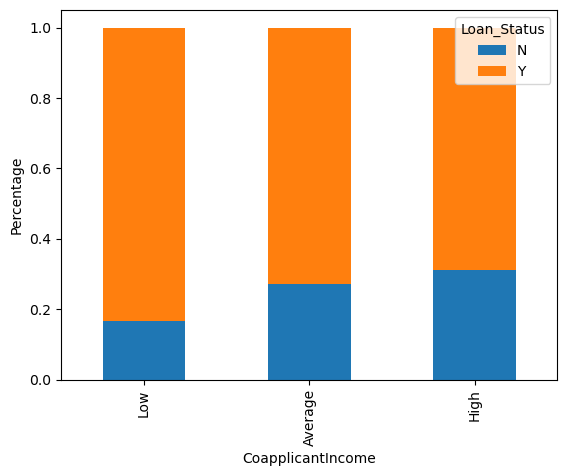

In [64]:
Coapplicant_Income_bin=pd.crosstab(kk['Coapplicant_Income_bin'],kk['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

## It shows that coapplicants income is less the chances of loan approval are high. Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total_Income on the Loan_Status.

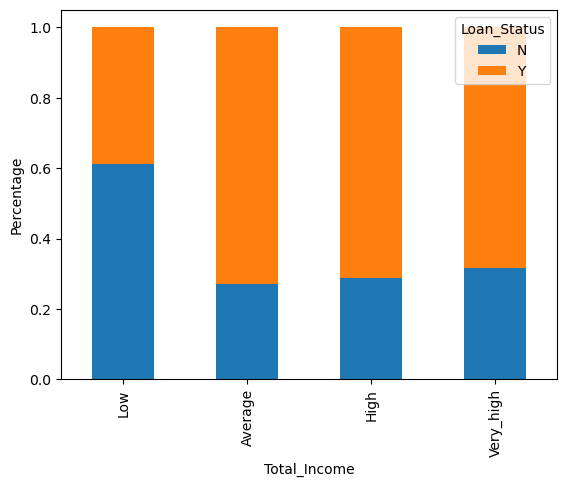

In [65]:
kk['Total_Income'] = kk['ApplicantIncome']+kk['CoapplicantIncome']
bins = [0,2500,4000,6000,81000]
group = ['Low', 'Average', 'High', 'Very_high']
kk['Total_Income_bin']=pd.cut(kk['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(kk['Total_Income_bin'],kk['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

### We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

Let’s visualize the Loan amount variable.

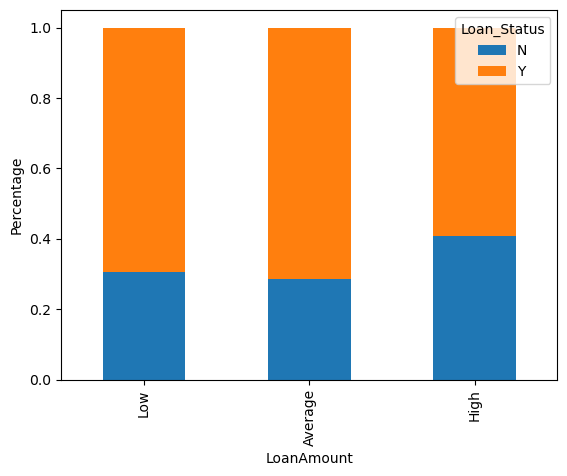

In [66]:
bins=[0,100,200,700]
group=['Low','Average','High']
kk['LoanAmount_bin']=pd.cut(kk['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(kk['LoanAmount_bin'],kk['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

In [67]:
kk.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   

   Credit_History Property_Area Loan_Status Income_bin Coapplicant_Income_bin  \
1             1.0         Rural           N       High                Average   
2             1.0         Urban           Y    Average                    NaN   
3             1.0         Urban           Y    Average                Average   
4             1.0         Urban           Y       High                    NaN   
5             1.0         Urban           Y       High                   High   

   Total_Income Total_Income_bin LoanAmount_bin  
1        6091.0        Very_high        Average  
2        3000.0          Average            Low  
3        4941.0             High        Average  
4        6000.0             High        Average  
5        9613.0        Very_high           High

In [68]:
kk.shape

(480, 18)

#### Now i have to drop the columns that i have made for the visualization for further processs

In [69]:
kk=kk.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income','Total_Income_bin'], axis=1)

In [70]:
kk.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   

   Credit_History Property_Area Loan_Status  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y  
5             1.0         Urban           Y

In [71]:
kk.shape

(480, 13)

In [72]:
kk['Dependents'].replace('3+', 3,inplace=True)
kk['Dependents'].replace('3+', 3,inplace=True)
kk['Loan_Status'].replace('N', 0,inplace=True)
kk['Loan_Status'].replace('Y', 1,inplace=True)

## correlation Matrix


<AxesSubplot:>

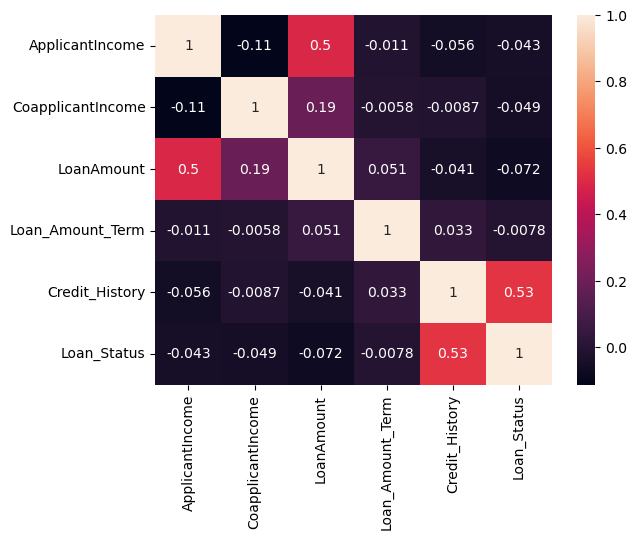

In [73]:
sns.heatmap(kk.corr(),annot=True)

## from here i will design machine learning model

In [74]:
kk.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   

   Credit_History Property_Area  Loan_Status  
1             1.0         Rural            0  
2             1.0         Urban            1  
3             1.0         Urban            1  
4             1.0         Urban            1  
5             1.0         Urban            1

In [75]:
kk.drop(['Loan_ID'],inplace=True,axis=1)

In [76]:
kk.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   
5   Male     Yes          2      Graduate           Yes             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

  Property_Area  Loan_Status  
1         Rural            0  
2         Urban            1  
3         Urban            1  
4         Urban            1  
5         Urban            1

In [77]:
kk['Property_Area'].describe()

count           480
unique            3
top       Semiurban
freq            191
Name: Property_Area, dtype: object

In [78]:
kk['Property_Area']

1          Rural
2          Urban
3          Urban
4          Urban
5          Urban
         ...    
609        Rural
610        Rural
611        Urban
612        Urban
613    Semiurban
Name: Property_Area, Length: 480, dtype: object

# Change categorical value into numerical value

In [79]:
kk['Gender'].replace('Male', 1,inplace=True)
kk['Gender'].replace('Female', 0,inplace=True)
kk['Married'].replace('Yes', 1,inplace=True)
kk['Married'].replace('No', 0,inplace=True)
kk['Education'].replace('Graduate',1,inplace=True)
kk['Education'].replace('Not Graduate',0,inplace=True)
kk['Self_Employed'].replace('No',0,inplace=True)
kk['Self_Employed'].replace('Yes',1,inplace=True)
kk['Property_Area'].replace('Rural',0,inplace=True)
kk['Property_Area'].replace('Urban',0,inplace=True)
kk['Property_Area'].replace('Semiurban',0,inplace=True)

In [80]:
kk.head()

Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1       1        1          1          1              0             4583   
2       1        1          0          1              1             3000   
3       1        1          0          0              0             2583   
4       1        0          0          1              0             6000   
5       1        1          2          1              1             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

   Property_Area  Loan_Status  
1              0            0  
2              0            1  
3              0            1  
4              0            1  
5              0            1

## Divide dataset into two dataset when for training the model and second for testing the model

In [81]:
X=kk.drop('Loan_Status',axis=1)

In [82]:
Y=kk['Loan_Status']

In [83]:
X

Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          3          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1               1508.0       128.0             360.0             1.0   
2                  0.0        66.0             360.0             1.0   
3               2358.0       120.0             360.0             1.0   
4                  0.0       141.0             360.0             1.0   
5               4196.0       267.0             360.0             1.0   
..                 ...         ...               ...             ...   
609                0.0        71.0             360.0             1.0   
610                0.0        40.0             180.0             1.0   
611              240.0       253.0             360.0             1.0   
612                0.0       187.0             360.0             1.0   
613                0.0       133.0             360.0             0.0   

     Property_Area  
1                0  
2                0  
3                0  
4                0  
5                0  
..             ...  
609              0  
610              0  
611              0  
612              0  
613              0  

[480 rows x 11 columns]

In [84]:
Y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

 1-> eligible for Loan
0-> not eligible for Loan

###  Data standardization Or Normalization

In [85]:
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
X=scalers.fit_transform(X)

In [86]:
X

array([[1.        , 1.        , 0.33333333, ..., 0.72972973, 1.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.72972973, 1.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.72972973, 1.        ,
        0.        ],
       ...,
       [1.        , 1.        , 0.33333333, ..., 0.72972973, 1.        ,
        0.        ],
       [1.        , 1.        , 0.66666667, ..., 0.72972973, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.72972973, 0.        ,
        0.        ]])

## Second i do standradization means mean=0,sd=1

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
#Std=StandardScaler()
#X=Std.fit_transform(X)

In [89]:
#X

## as the data is already in range so,if i would not perform standardscaler then it is also good

#### cross-Validation:it is a process in which we preserve some data for testing process


In [90]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [91]:
X.shape,X_train.shape,X_test.shape

((480, 11), (384, 11), (96, 11))

In [92]:
Y.shape,Y_train.shape,Y_test.shape

((480,), (384,), (96,))

## model Selection

In [93]:
#USE DIFFERENT DIFFERNT MODEL TO CHECK THE ACCURACY(TRAINING AND TESTING ACCURACY).
#I WILL USE ONLY THOSE MODEL FOR FURTHER STEP(TRAINING STAGE)WHICH GIVE PROPER VALUE OF ACCURACY
#BECAUSE THE MODEL WHICH GIVE PROPER ACCURACY CAN PREDICT THE RESULT IN BETTER WAY
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
results=[]
names=[]
# create instances of all models
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}
from sklearn.metrics import accuracy_score
print("TRAINING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    trainacc = accuracy_score( X_train_prediction, Y_train)
    print(f'{name}:\ntrainAccuracy: {trainacc:.4f}')
#for testing  data  
print("TESTING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    testacc = accuracy_score(Y_test, y_pred)
    print(f'{name}:\ntestingAccuracy: {testacc:.4f}') 

TRAINING ACCURACY:
Linear Discriminant Analysis:
trainAccuracy: 0.8047
Logistic Regression:
trainAccuracy: 0.8021
Naive Bayes:
trainAccuracy: 0.7917
Support Vector Machine:
trainAccuracy: 0.8021
K-Nearest Neighbors:
trainAccuracy: 0.8125
Decision Tree:
trainAccuracy: 1.0000
Random Forest:
trainAccuracy: 1.0000
Bagging:
trainAccuracy: 0.9870


/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


AdaBoost:
trainAccuracy: 0.8516
Gradient Boosting:
trainAccuracy: 0.9141
Extra Trees:
trainAccuracy: 1.0000
TESTING ACCURACY:
Linear Discriminant Analysis:
testingAccuracy: 0.8333
Logistic Regression:
testingAccuracy: 0.8333
Naive Bayes:
testingAccuracy: 0.8021
Support Vector Machine:
testingAccuracy: 0.8333
K-Nearest Neighbors:
testingAccuracy: 0.8021
Decision Tree:
testingAccuracy: 0.7083


/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Random Forest:
testingAccuracy: 0.8125
Bagging:
testingAccuracy: 0.7917
AdaBoost:
testingAccuracy: 0.8438
Gradient Boosting:
testingAccuracy: 0.8021
Extra Trees:
testingAccuracy: 0.6562


In [94]:
#logistic regression is good in terms of both training and testing score
model=LogisticRegression()

In [95]:
lps=model.fit(X_train,Y_train)

In [96]:
X_train_prediction=lps.predict(X_train)
training_accuracy=accuracy_score(X_train_prediction,Y_train)

In [97]:
training_accuracy

0.8020833333333334

In [98]:
X_testing_prediction=lps.predict(X_test)
testing_accuracy=accuracy_score(X_testing_prediction,Y_test)

In [99]:
testing_accuracy

0.8333333333333334

<AxesSubplot:>

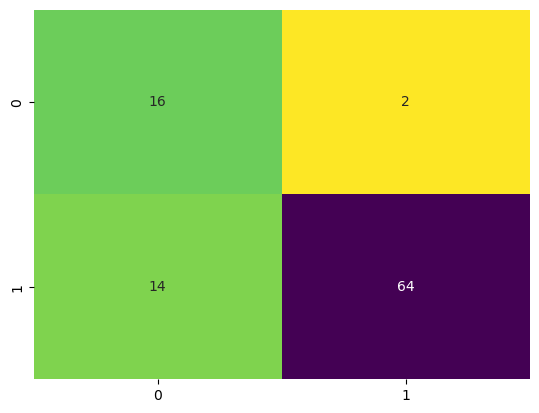

In [100]:
#confusion matrix for that
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(X_testing_prediction,Y_test) 
sns.heatmap(cm, annot=True, cbar=False, cmap="viridis_r",
            yticklabels=lps.classes_, xticklabels=lps.classes_)

In [101]:
# Print the precision and recall, among other metrics
from sklearn import metrics
print(metrics.classification_report(Y_test, X_testing_prediction))

              precision    recall  f1-score   support

           0       0.89      0.53      0.67        30
           1       0.82      0.97      0.89        66

    accuracy                           0.83        96
   macro avg       0.85      0.75      0.78        96
weighted avg       0.84      0.83      0.82        96



/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Logistic Regression ')

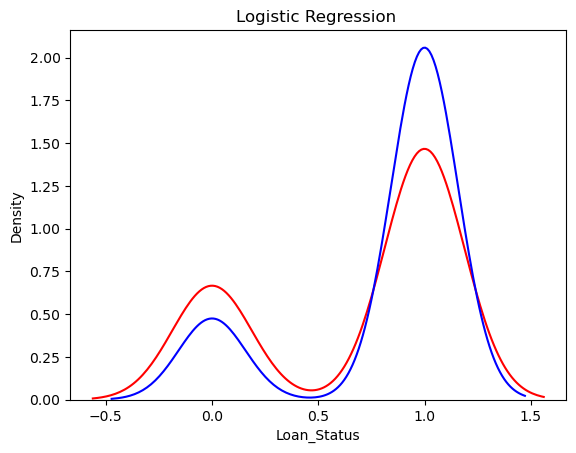

In [102]:
ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
sns.distplot(X_testing_prediction,hist=False,color="b",label="Predicted value",ax=ax)
plt.title('Logistic Regression ')

In [108]:
# making a predictive System for testing the data 
# making a predictive System
input_data=(1,1,0,1,1,3000,0.0,66.0,360.0,1,0)
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#as i already standarize the data so here for input value we once standarize this
std_data=scalers.transform(input_data_reshaped)
print(std_data)
#std_data=scalers.transform(std_data)
#print(std_data)
prediction=lps.predict(std_data)#model=logisticregression
print("target:",prediction)
if(prediction==0):
    print("NOt eligible for loan")
elif(prediction==1):
    print("eligible for loan")

[[1.         1.         0.         1.         1.         0.03525046
  0.         0.0964467  0.72972973 1.         0.        ]]
target: [1]
eligible for loan


/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [109]:
kk.head()

Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1       1        1          1          1              0             4583   
2       1        1          0          1              1             3000   
3       1        1          0          0              0             2583   
4       1        0          0          1              0             6000   
5       1        1          2          1              1             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

   Property_Area  Loan_Status  
1              0            0  
2              0            1  
3              0            1  
4              0            1  
5              0            1